# Setup

In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import shutil

from os.path import expanduser, join
from tqdm import tqdm_notebook

home_path = expanduser("~")
save_folder = join('..', 'data', 'interim')
random_state = 10

In [3]:
!rm -rf ~/repos/udacity_carnd/project_3/data/interim/img

In [4]:
!mkdir -p ~/repos/udacity_carnd/project_3/data/interim/img/center
!mkdir -p ~/repos/udacity_carnd/project_3/data/interim/img/left
!mkdir -p ~/repos/udacity_carnd/project_3/data/interim/img/right

# Helpers

In [5]:
def transform_image_path(df):
    prefix = 'data/interim/img'
    
    df['center'] = prefix + '/center/' + df['center'].str.split('/').str[-1]
    df['left'] = prefix + '/left/' + df['left'].str.split('/').str[-1]
    df['right'] = prefix + '/right/' + df['right'].str.split('/').str[-1]
    
    return df

In [6]:
# logs[header, location]
logs = [(0, '../data/raw/sample/driving_log.csv'),
        (None, '../data/raw/sim_track_1_direction_default/driving_log.csv'),
        (None, '../data/raw/sim_track_1_direction_reverse/driving_log.csv'),
        (None, '../data/raw/sim_track_2_direction_default/driving_log.csv'),
        (None, '../data/raw/sim_track_2_direction_reverse/driving_log.csv')]
# logs = [(0, '../data/raw/sample/driving_log.csv'),]
#         (None, '../data/raw/sim_track_1_direction_reverse/driving_log.csv'),]
#         (None, '../data/raw/sim_track_1_direction_default/driving_log.csv'),
         

# combine log data into a single dataframe
columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
df = pd.DataFrame(columns=columns)
for header, log_path in logs:
    df_temp = pd.read_csv(log_path, header=header, names=columns)
    
    # sample data
    # it has different path strings from simulation data
    if header == 0:
        sample_path = join(home_path, 'repos/udacity_carnd/project_3/data/raw/sample')
        df_temp['center'] = sample_path + '/' + df_temp['center'].str.strip()
        df_temp['left'] = sample_path + '/' + df_temp['left'].str.strip()
        df_temp['right'] = sample_path + '/' + df_temp['right'].str.strip()
    
    df = df.append(df_temp)

In [7]:
df.sample(10, random_state=random_state)

,center,left,right,steering,throttle,brake,speed
5766,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.985533,0.0,30.186570
6182,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.316105,0.985533,0.0,30.183410
4060,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.476379,0.0,23.853930
7608,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.211667,0.985533,0.0,30.185320
4489,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.000000,0.0,4.155685
66,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.985533,0.0,18.542930
4591,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.281836,0.985533,0.0,30.181030
4485,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.000000,0.0,4.326865
6108,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.985533,0.0,30.186330
2193,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.042623,0.985533,0.0,30.186590


In [8]:
df_new = transform_image_path(df.copy(deep=True))

In [9]:
df.sample(10, random_state=random_state)

,center,left,right,steering,throttle,brake,speed
5766,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.985533,0.0,30.186570
6182,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.316105,0.985533,0.0,30.183410
4060,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.476379,0.0,23.853930
7608,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.211667,0.985533,0.0,30.185320
4489,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.000000,0.0,4.155685
66,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.985533,0.0,18.542930
4591,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.281836,0.985533,0.0,30.181030
4485,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.000000,0.0,4.326865
6108,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.000000,0.985533,0.0,30.186330
2193,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.042623,0.985533,0.0,30.186590


In [10]:
df_new.sample(10, random_state=random_state)

,center,left,right,steering,throttle,brake,speed
5766,data/interim/img/center/center_2016_12_01_13_4...,data/interim/img/left/left_2016_12_01_13_42_51...,data/interim/img/right/right_2016_12_01_13_42_...,0.000000,0.985533,0.0,30.186570
6182,data/interim/img/center/center_2016_12_01_13_4...,data/interim/img/left/left_2016_12_01_13_43_33...,data/interim/img/right/right_2016_12_01_13_43_...,-0.316105,0.985533,0.0,30.183410
4060,data/interim/img/center/center_2016_12_01_13_3...,data/interim/img/left/left_2016_12_01_13_39_29...,data/interim/img/right/right_2016_12_01_13_39_...,0.000000,0.476379,0.0,23.853930
7608,data/interim/img/center/center_2016_12_01_13_4...,data/interim/img/left/left_2016_12_01_13_45_58...,data/interim/img/right/right_2016_12_01_13_45_...,-0.211667,0.985533,0.0,30.185320
4489,data/interim/img/center/center_2016_12_01_13_4...,data/interim/img/left/left_2016_12_01_13_40_13...,data/interim/img/right/right_2016_12_01_13_40_...,0.000000,0.000000,0.0,4.155685
66,data/interim/img/center/center_2016_12_01_13_3...,data/interim/img/left/left_2016_12_01_13_32_44...,data/interim/img/right/right_2016_12_01_13_32_...,0.000000,0.985533,0.0,18.542930
4591,data/interim/img/center/center_2016_12_01_13_4...,data/interim/img/left/left_2016_12_01_13_40_52...,data/interim/img/right/right_2016_12_01_13_40_...,0.281836,0.985533,0.0,30.181030
4485,data/interim/img/center/center_2016_12_01_13_4...,data/interim/img/left/left_2016_12_01_13_40_12...,data/interim/img/right/right_2016_12_01_13_40_...,0.000000,0.000000,0.0,4.326865
6108,data/interim/img/center/center_2016_12_01_13_4...,data/interim/img/left/left_2016_12_01_13_43_26...,data/interim/img/right/right_2016_12_01_13_43_...,0.000000,0.985533,0.0,30.186330
2193,data/interim/img/center/center_2016_12_01_13_3...,data/interim/img/left/left_2016_12_01_13_36_20...,data/interim/img/right/right_2016_12_01_13_36_...,0.042623,0.985533,0.0,30.186590


In [11]:
s = df[0:1]['center'].values
print(s)

[ '/home/adrian/repos/udacity_carnd/project_3/data/raw/sample/IMG/center_2016_12_01_13_30_48_287.jpg']


# File copy

In [12]:
df_new.to_csv(
    join(home_path,
         'repos/udacity_carnd/project_3/data/interim/img/driving_log.csv'),
    index=False)

In [13]:
for source_paths, save_paths in tqdm_notebook(
        zip(df[['center', 'left', 'right']].values,
            df_new[['center', 'left', 'right']].values),
        desc='rows',
        leave=False):

    for source_path, save_path in zip(source_paths, save_paths):
        save_path = join(home_path, 'repos/udacity_carnd/project_3', save_path)
        shutil.copyfile(source_path, save_path)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [14]:
image_to_check_path = join(
    home_path,
    'repos/udacity_carnd/project_3/data/interim/img/center/center_2016_12_01_13_30_48_287.jpg'
)
print(image_to_check_path)

/home/adrian/repos/udacity_carnd/project_3/data/interim/img/center/center_2016_12_01_13_30_48_287.jpg


(160, 320, 3)


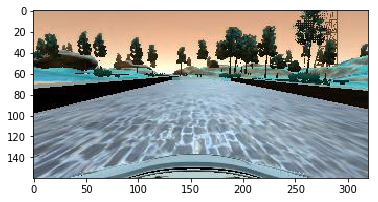

In [15]:
image_to_check = cv2.imread(image_to_check_path, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_check)
print(image_to_check.shape)

(80, 160)


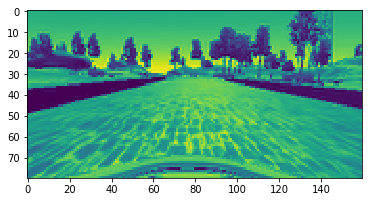

In [16]:
image_to_check = cv2.imread(image_to_check_path, cv2.COLOR_BGR2YUV)
plt.imshow(image_to_check)
print(image_to_check.shape)

(160, 320, 3)


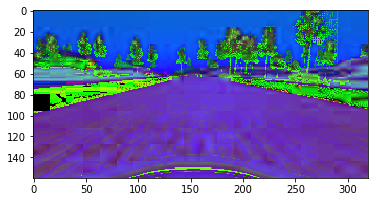

In [17]:
image_to_check = cv2.imread(image_to_check_path, cv2.COLOR_BGR2RGB)
image_to_check = cv2.cvtColor(image_to_check, cv2.COLOR_RGB2HSV)
plt.imshow(image_to_check)
print(image_to_check.shape)